<a href="https://colab.research.google.com/github/Srijansarkar17/CODSOFT/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Churn Prediction
1. Data Cleaning
2. Data Visualisation
3. Splitting training and testing set
4. Training and Testing the Model
5. Plotting the ROC Curve

In [165]:
import pandas as pd
import numpy as np

#DATA PREPROCESSING


In [166]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [167]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [168]:
df.shape

(10000, 14)

In [169]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [170]:
deleted_columns = df[['RowNumber', 'CustomerId']]
df.drop(deleted_columns, axis=1, inplace=True)

In [171]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [172]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [173]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [174]:
df['Geography'] = le.fit_transform(df['Geography'])

In [175]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [176]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [177]:
df.duplicated().sum()

0

In [178]:
df.drop('Surname', axis=1, inplace=True)

In [179]:
df['EstimatedSalary'] = np.log(df['EstimatedSalary'])

In [180]:
print(df['EstimatedSalary'])

0       11.526324
1       11.631087
2       11.643353
3       11.449204
4       11.278267
          ...    
9995    11.474919
9996    11.529780
9997    10.647460
9998    11.439155
9999    10.550349
Name: EstimatedSalary, Length: 10000, dtype: float64


In [181]:
df['Balance'] = np.log(df['Balance'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [182]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
#removed the infinite values

In [183]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance            3617
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
dtype: int64

In [184]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance            3617
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
dtype: int64

In [185]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,NaN,1,1,1,11.526324,1
1,608,2,0,41,1,11.336282,1,0,1,11.631087,0
2,502,0,0,42,8,11.980807,3,1,0,11.643353,1
3,699,0,0,39,1,NaN,2,0,0,11.449204,0
4,850,2,0,43,2,11.740147,1,1,1,11.278267,0


In [186]:
df['CreditScore'] = np.log(df['CreditScore'])

In [187]:
df['Age'] = np.log(df['Age'])

In [188]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance            3617
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
dtype: int64

In [189]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df.iloc[:, 5:6] = imputer.fit_transform(df.iloc[:, 5:6])
#filled the null column with mean values

In [190]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [191]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [192]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,6.428105,0,0,3.737670,2,11.658031,1,1,1,11.526324,1
1,6.410175,2,0,3.713572,1,11.336282,1,0,1,11.631087,0
2,6.218600,0,0,3.737670,8,11.980807,3,1,0,11.643353,1
3,6.549651,0,0,3.663562,1,11.658031,2,0,0,11.449204,0
4,6.745236,2,0,3.761200,2,11.740147,1,1,1,11.278267,0


<Axes: >

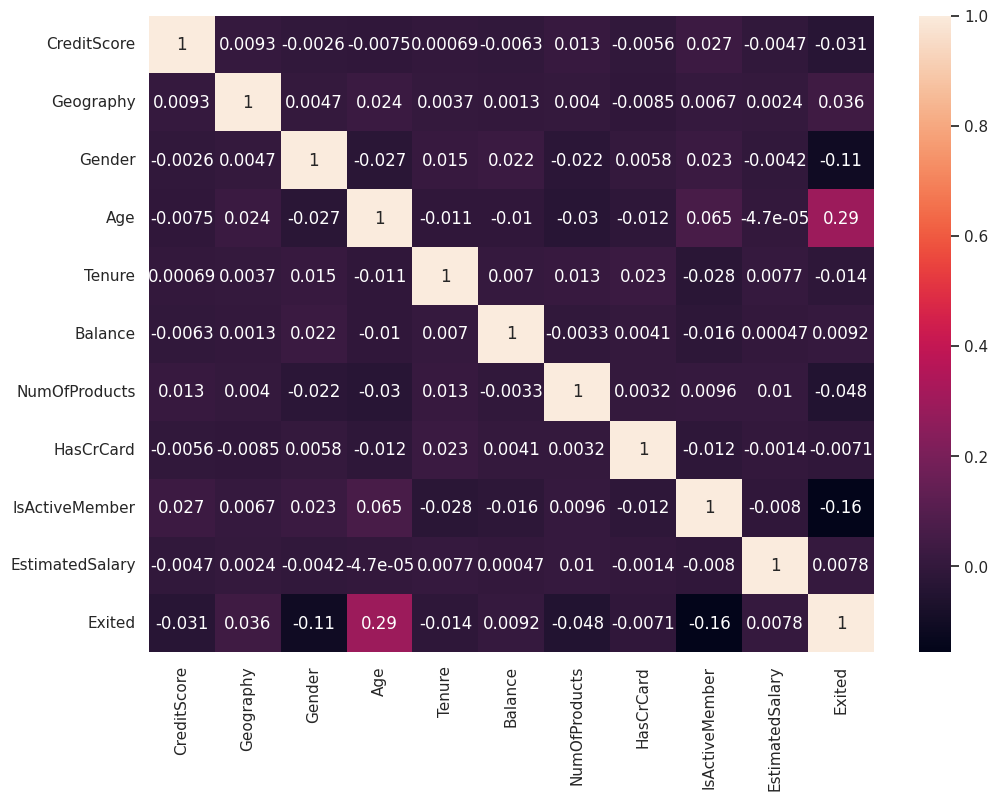

In [193]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), annot=True)

In [194]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [195]:
df.max()

CreditScore         6.745236
Geography           2.000000
Gender              1.000000
Age                 4.521789
Tenure             10.000000
Balance            12.432802
NumOfProducts       4.000000
HasCrCard           1.000000
IsActiveMember      1.000000
EstimatedSalary    12.206035
Exited              1.000000
dtype: float64

In [196]:
df.min()

CreditScore        5.857933
Geography          0.000000
Gender             0.000000
Age                2.890372
Tenure             0.000000
Balance            8.234483
NumOfProducts      1.000000
HasCrCard          0.000000
IsActiveMember     0.000000
EstimatedSalary    2.449279
Exited             0.000000
dtype: float64

In [197]:
#oversampled the data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

#Splitting the Dataset into train and test

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)

###Using RandomForestClassification for training

In [200]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [201]:
y_pred = rf.predict(X_test)

In [202]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(precision*100))
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 87.76%
Precision: 87.78%
[[1330  204]
 [ 186 1466]]


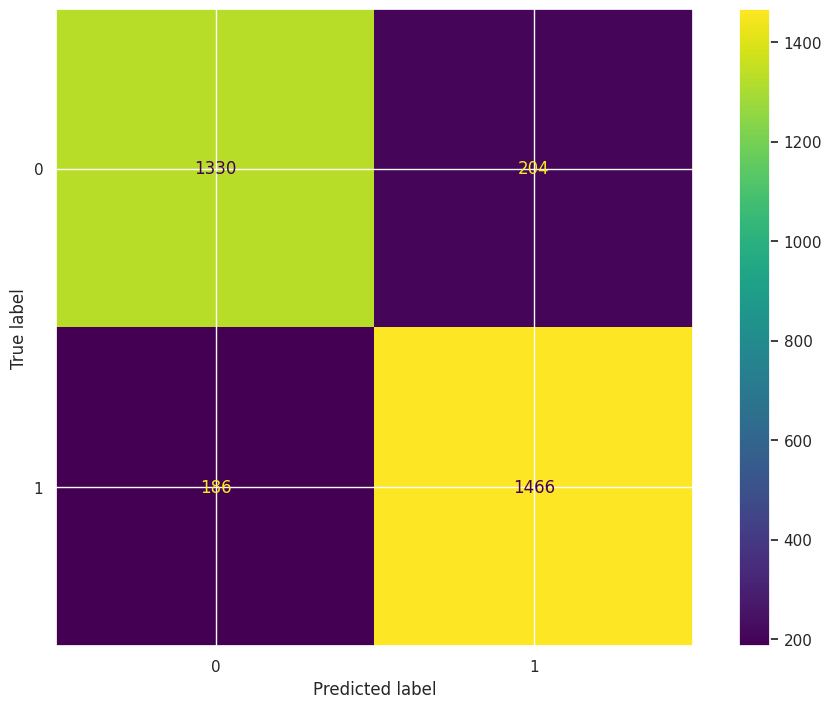

In [203]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = matrix)
disp.plot()

In [204]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)

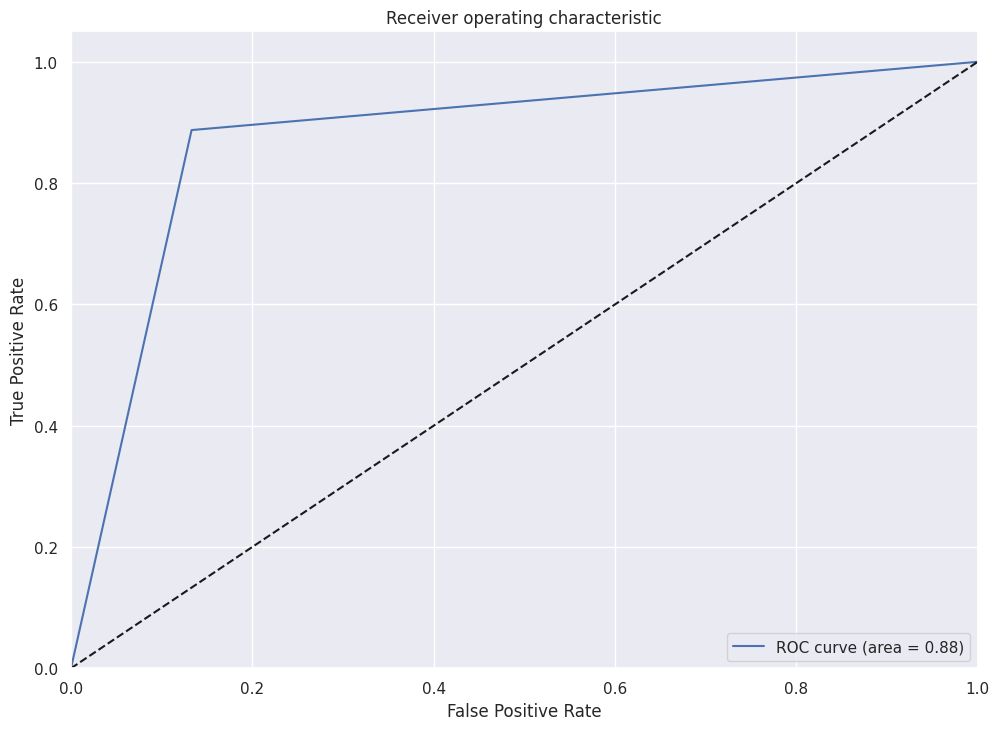

In [205]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
#plotting The ROC Curve